# Introduction to Linear Regression



**Objectives**

- Explain what supervised learning is
- Explain what a regression problem is
- Explain what a model is
- Set up a DataFrame for modeling (without TTS)
- Explain what linear regression is doing at a high level
- Instantiate, fit, generate predictions from, and evaluate a linear regression model in `scikit-learn`
- Interpret the coefficients of a linear regression model




## Data
### Let's make a model for car prices. 🚙

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data are from [carvana](https://www.carvana.com/cars).

A DataFrame of prices.

In [2]:
df_cars = pd.DataFrame({
    'price':
    [34990, 32590, 25990, 32590, 30990, 36990, 44990, 28990, 39990, 
     30990, 31990, 28590, 15990, 21990, 35590, 27990, 21990, 24990, 21990, 20590, 22990, 19990],
})

In [3]:
df_cars.head()

,price
0,34990
1,32590
2,25990
3,32590
4,30990


(array([1., 2., 4., 2., 3., 5., 2., 1., 1., 1.]),
 array([15990., 18890., 21790., 24690., 27590., 30490., 33390., 36290.,
        39190., 42090., 44990.]),
 <BarContainer object of 10 artists>)

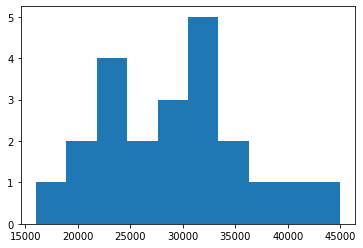

In [4]:
#histogram of prices
plt.hist(df_cars)

--- 
## The Null (Baseline) model ⭐️

If we had to guess the price of a new data point - with no other information - what would you pick?

## How could we improve our model?

### Let's add year as a predictor

In [8]:
year=[
    2019, 2018, 2019, 2015, 2018, 2017, 2020, 2019, 2019, 
    2014, 2019, 2019, 2010, 2018, 2018, 2019, 2014, 2017, 2018, 2017, 2014, 2018
]

In [9]:
df_cars['year']=year

In [10]:
df_cars.head()

,price,year
0,34990,2019
1,32590,2018
2,25990,2019
3,32590,2015
4,30990,2018


In [ ]:
#scatterplot 


#### Correlations

The strength of a Linear Relationship between two variables.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png)

Mathematically this is expressed as:

$${\displaystyle r_{xy}\quad {\overset {\underset {\mathrm {def} }{}}{=}}\quad {\frac {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{(n-1)s_{x}s_{y}}}={\frac {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sqrt {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})^{2}\sum \limits _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}},}$$

In [8]:
#examine the correlation


#### What does the relationsip between year and price  look like?

Newer year the higher the price

#### The OLS regression line
Seaborn will plot the best fit line for us.

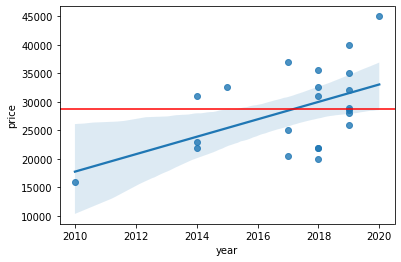

In [15]:
#compare the model to the baseline


#### Is that a line better fit the data than our old line that was just the mean? 

Looks like it. We'll discuss evaluation metrics in a bit.

Let's look at how we make a regression line.

## Lines

This was the equation I learned for a line. Look familiar?

$$ \large y = mx + b$$

In data science it gets changed to 

$$ \large  y = \beta_0 + \beta_1 x_1 $$

### Errors

Our model isn't going to be perfect. The things our model doesn't capture are errors and denoted by $\epsilon$ (epsilon).


$$ \large y = \beta_0 + \beta_1 x_1 + \epsilon $$

### OLS Regression Modeling

We have _x_ and we have _y_. That's our data. 

## **Our model is trying to figure out the best betas. 😀**

$$ \large y = \hat \beta_0 + \hat \beta_1 x_1 $$


$\hat \beta_0$ is the y-intercept that our model learns. The point where the line crosses 0 on the y-axis.

$\hat \beta_1$ is the coefficient that we multiply by our $x_1$ variable. It's the slope. For ever 1 unit it change in $x_1$, y increases by the value of $\beta1$.

$y$ is the ground truth of our target variable. 


$$ \large \hat y =  \beta_0 +  \beta_1 x_1 $$

When we have a model that has been fit with the data (the betas have been computed) we can plug in a new *x* value and solve for $\hat y$. 

### $\hat y$ is your model's prediction! 


___ 
### Let's fit an OLS regression model in scikit-learn.

### Step 1: Assemble our X and y variables

 We need an X matrix that is n-by-p.
- n = rows
- p = features

A feature just means a predictor column.

In the simple linear regression case, p = 1. We have one feature. Usually you'll have more than 1 feature. 

In [16]:
# X = year
X = df_cars[['year']]
X.shape

(22, 1)

### Scikit-learn estimators expect a two dimensional object. 

Usually we have more than one predictor variable. Not here.

y is the outcome variable

In [17]:
# y = price


#### What's the shape of y?

In [18]:
# shape of X
X.shape

(22, 1)

In [19]:
# shape of y
y.shape

(22,)

#### Why is the target variable a pandas Series or 1D numpy array? 

Scikit-learn supervised learning estimators are expecting a single output column. Estimators predict one value for each observation, generally.

### Step 2: Import our model class

In [20]:
from sklearn.linear_model import LinearRegression

### Step 3: Instantiate the model

#### What is `lr`?

sklearn.linear_model._base.LinearRegression

### Step 4: Fit the model

LinearRegression()

#### What did we just do?

Called the fit method on the object. We passed it X and y, in that order.

The fit method did matrix multiplication to estimate $\beta_0 $ and $\beta_1 $.

## Step 5: Check our model weights
#### Take a peek at the model's intercept coefficient

In [24]:
#intercept


-3051883.8530399106

#### What does that mean?

A car from year 0 wouldn't be worth anything. The model doesn't understand classic cars. 😉

#### What does that coefficient mean ($\beta_1$)?

In [25]:
#coef


array([1527.19134651])


We now have the following model of reality:

$$\hat{y} = -3,051,883 + 1,527  x$$

### ⭐️ For every one unit increase in year, the price of the car would be expected to increase by $1,527 ⭐️

## Step 6: Make predictions

If we had new data points for year we could pass it to the predict method to generate price predictions.

We don't have any new data, so let's just see what predictions our model would have made. This is the same as saying "Find the x value for a prediction on the plot and go up to our line. That value for y is our prediction."

We do this for all the X values.

In [26]:
# predictions


#### Why don't we pass `y`?

We are trying to predict y!

#### What type of object is y_pred?

In [27]:
# chect yhat


numpy.ndarray

### Plot Predictions

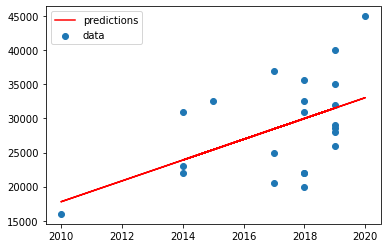

In [28]:
#plot predictions


## Step 7: Score the predictions

### Mean squared error is a popular scoring metric. 
Lower is better. That's the case whenever "error" is in the metric name.

$$ MSE = \frac{1}{n} \sum (y_i - \hat{y}_i)^2 $$

$$ = \frac{1}{n} \sum e_i^2 $$

### MSE by hand:

#### Create residuals (a.k.a. errors). The left-over values.

*y* is our ground truth. The actual values.

In [29]:
# the ground truth


0    34990
1    32590
2    25990
3    32590
4    30990
Name: price, dtype: int64

In [30]:
# our model's predictions


array([31515.47556882, 29988.2842223 , 31515.47556882, 25406.71018277,
       29988.2842223 ])

In [31]:
# residuals


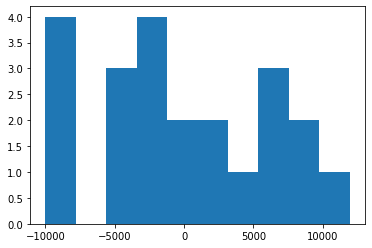

In [32]:
# examine residual histogram


Square the residuals. Then take the mean.

#### Compute the MSE

In [33]:
# square the residuals aka square the errors


36738569.7331386

Let's check our answer with the result of the scikit-learn function that computes MSE for us.

In [34]:
# mse


In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
#use mean_squared error


36738569.7331386

### How does our model with year model compare to our null model?

Our null model, also known as the baseline model, is just guessing the mean every time.

There are a bunch of ways to make a 1D array that's the same length as y, filled with the mean value.

`np.full_like` is a nice one. Check out the function signature.

In [37]:
y.shape

(22,)

In [38]:
# use np.full_like


In [39]:
# mean squared error of baseline


49658181.81818182

#### Which model fits the data better?

Our regression model wins!

## You made your first Linear Regression Model🎉

___ 
# Linear Regression Exercise with Electricity

Now you make a Linear Regression Model and Null model for electricity demand data. Ignore that there is potentially some time series component to the data.

## The Data
Data source: [here](https://www.rdocumentation.org/packages/fpp2/versions/2.3/topics/elecdemand)

The data consist of electricity demand for Victoria, Australia every half-hour in 2014. We have three columns:

* Total electricity demand (in gigawatts)
* Whether or not it is a workday (0/1)
* Temperature (Celsius)

In [41]:
elec = pd.read_csv('data/elecdemand.csv')

In [42]:
elec.head()

,demand,workday,temp
0,3.914647,0,18.2
1,3.672550,0,17.9
2,3.497539,0,17.6
3,3.339145,0,16.8
4,3.204313,0,16.3


#### We'll limit our focus to only days in which it was at least 15 degrees Celsius (59 F)

In [9]:
#subset to temp > 15


#### Plot temperature vs. demand


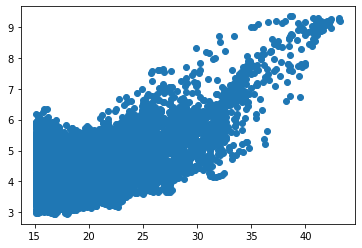

In [45]:
#scatter


### Step 1: Assemble our X and y variables

 We need an X matrix that is n-by-p (in this case, p = 1)
- n = rows
- p = features

X is the predictor variable. We are looking at temperature. 

y is the outcome variable

In [10]:
#x and y


### Step 2: Import our model class

In [ ]:
# from sklearn.linear_model import LinearRegression  # already imported

### Step 3: Instantiate the model

### Step 4: Fit the model

LinearRegression()

## Step 5: Check our model weights

#### Interpret $\beta_1$


2.318762978267358

array([0.11415682])

## Step 6: Make predictions

### Plot the predictions

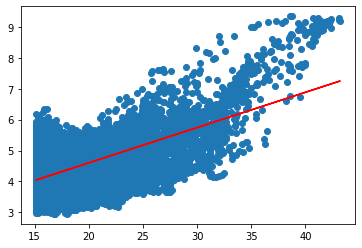

## Step 7: Score the predictions with MSE

0.5050316037069877

### Create the predictions for the "null model"

array([4.62452473, 4.62452473, 4.62452473, ..., 4.62452473, 4.62452473,
       4.62452473])

#### The null MSE

0.779688546631205

0.5050316037069877

#### Does your OLS regression model better fit the data than a null model? ⚠

You've seen linear regression with a single predictor variable. That's called _simple linear regression_. Next time we will discuss multiple regression with many input variables.

#### The `DummyRegressor`

An easier way to set a baseline.

In [ ]:
#import


In [ ]:
#instantiate


In [11]:
#fit 


In [12]:
#predict


In [13]:
#score
